In [33]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

### Taking test image to get idea how to process the image and code a function

In [34]:
img = cv2.imread('./test/test1.jpg')
img.shape

(502, 385, 3)

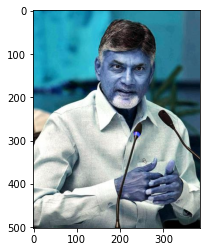

In [35]:
plt.imshow(img)

In [36]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(502, 385)

In [37]:
gray

array([[147, 149, 153, ..., 112, 111, 112],
       [147, 150, 153, ..., 112, 112, 112],
       [148, 151, 154, ..., 112, 112, 112],
       ...,
       [ 38,  32,  31, ...,   0,   0,   1],
       [ 11,   4,   2, ...,   0,   0,   1],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

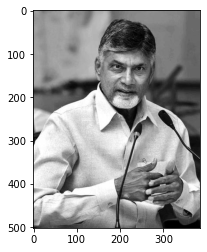

In [38]:
plt.imshow(gray, cmap='gray')

In [39]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [40]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[150,  85, 138, 138]], dtype=int32)

In [41]:
(x,y,w,h) = faces[0]
x,y,w,h

(150, 85, 138, 138)

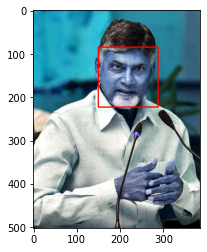

In [42]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

## for the code below to detect the Eyes and face of the image

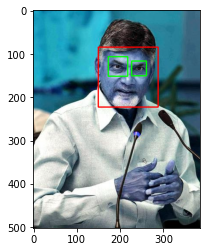

In [43]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

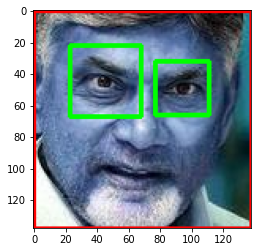

In [44]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

## her written code to crop the image to region of interest

In [45]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

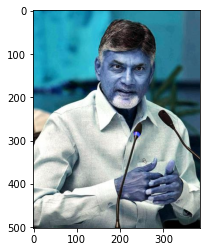

In [46]:
original_image = cv2.imread('./test/test1.jpg')
plt.imshow(original_image)

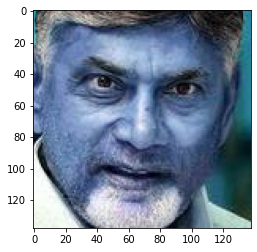

In [47]:
cropped_image = get_cropped_image_if_2_eyes('./test/test1.jpg')
plt.imshow(cropped_image)

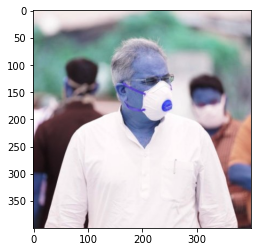

In [48]:
org_image_obstructed = cv2.imread('./test/test2.jpg')
plt.imshow(org_image_obstructed)

In [49]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test/test2.jpg')
cropped_image_no_2_eyes

In [50]:
path_to_data = "./data/"
path_to_cr_data = "./cropped/"

### the code below is to get directories of sub folder and storing into list

In [51]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [52]:
img_dirs

['./data/.ipynb_checkpoints',
 './data/Arvind Kejriwal',
 './data/Ashok Gehlot',
 './data/Basavaraj Bommai',
 './data/Bhupendrabhai Patel',
 './data/Bhupesh Baghel',
 './data/Biplab Kumar Deb',
 './data/chandrababu',
 './data/Charanjit Singh Channi',
 './data/Conrad Kongkal Sangma',
 './data/Digvijaya Singh',
 './data/Hemant Soren',
 './data/Himanta Biswa Sarma',
 './data/Jai Ram Thakur',
 './data/Kalvakuntla Chandrashekar Rao',
 './data/M. K. Stalin',
 './data/Mamata Banerjee',
 './data/Manohar Lal Khattar',
 './data/Mehbooba Mufti',
 './data/narendra modi',
 './data/Naveen Patnaik',
 './data/Neiphiu Rio',
 './data/Nitish Kumar',
 './data/Nongthombam Biren Singh',
 './data/Pema Khandu',
 './data/Pinarayi Vijayan',
 './data/Pramod Sawant',
 './data/Prem Singh Tamang',
 './data/Pushkar Singh Dhami',
 './data/Uddhav Thackeray',
 './data/Yogi Adityanath',
 './data/YS jagan mohan reddy',
 './data/Zoramthanga']

### Here i am checking the cropped folder is ther in the path or not if not it will create the folder

In [53]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

### here first i am doing getting the name of the politician and making the directories with name of them and after the crop is done appending the cropped images into the particular politician name

In [54]:
cropped_image_dirs = []
politician_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    politician_name = img_dir.split('/')[-1]
    print(politician_name)
    
    politician_file_names_dict[politician_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + politician_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = politician_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            politician_file_names_dict[politician_name].append(cropped_file_path)
            count += 1
    print(count)

.ipynb_checkpoints
1
Arvind Kejriwal
Generating cropped images in folder:  ./cropped/Arvind Kejriwal
20
Ashok Gehlot
Generating cropped images in folder:  ./cropped/Ashok Gehlot
15
Basavaraj Bommai
Generating cropped images in folder:  ./cropped/Basavaraj Bommai
15
Bhupendrabhai Patel
Generating cropped images in folder:  ./cropped/Bhupendrabhai Patel
4
Bhupesh Baghel
Generating cropped images in folder:  ./cropped/Bhupesh Baghel
15
Biplab Kumar Deb
Generating cropped images in folder:  ./cropped/Biplab Kumar Deb
27
chandrababu
Generating cropped images in folder:  ./cropped/chandrababu
25
Charanjit Singh Channi
Generating cropped images in folder:  ./cropped/Charanjit Singh Channi
13
Conrad Kongkal Sangma
Generating cropped images in folder:  ./cropped/Conrad Kongkal Sangma
5
Digvijaya Singh
Generating cropped images in folder:  ./cropped/Digvijaya Singh
7
Hemant Soren
Generating cropped images in folder:  ./cropped/Hemant Soren
18
Himanta Biswa Sarma
Generating cropped images in fold

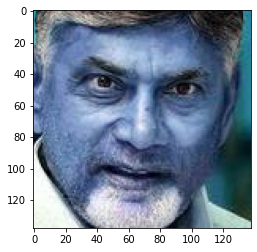

In [59]:
%matplotlib inline
plt.imshow(cropped_image, cmap='gray')

In [61]:
cropped_img = np.array(cropped_image)
cropped_img.shape

(138, 138, 3)

### (3) Preprocessing: Use wavelet transform as a feature for traning our model
### In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc
### Wavelet transform

In [62]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to 
    
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

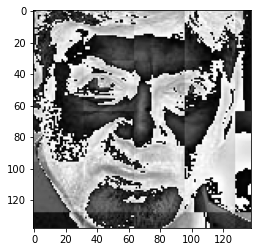

In [63]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [64]:
politician_file_names_dict = {}
for img_dir in cropped_image_dirs:
    politician_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    politician_file_names_dict[politician_name] = file_list
politician_file_names_dict

{'Arvind Kejriwal': ['./cropped/Arvind Kejriwal\\Arvind Kejriwal1.png',
  './cropped/Arvind Kejriwal\\Arvind Kejriwal10.png',
  './cropped/Arvind Kejriwal\\Arvind Kejriwal11.png',
  './cropped/Arvind Kejriwal\\Arvind Kejriwal12.png',
  './cropped/Arvind Kejriwal\\Arvind Kejriwal13.png',
  './cropped/Arvind Kejriwal\\Arvind Kejriwal14.png',
  './cropped/Arvind Kejriwal\\Arvind Kejriwal15.png',
  './cropped/Arvind Kejriwal\\Arvind Kejriwal16.png',
  './cropped/Arvind Kejriwal\\Arvind Kejriwal17.png',
  './cropped/Arvind Kejriwal\\Arvind Kejriwal18.png',
  './cropped/Arvind Kejriwal\\Arvind Kejriwal19.png',
  './cropped/Arvind Kejriwal\\Arvind Kejriwal2.png',
  './cropped/Arvind Kejriwal\\Arvind Kejriwal3.png',
  './cropped/Arvind Kejriwal\\Arvind Kejriwal4.png',
  './cropped/Arvind Kejriwal\\Arvind Kejriwal5.png',
  './cropped/Arvind Kejriwal\\Arvind Kejriwal6.png',
  './cropped/Arvind Kejriwal\\Arvind Kejriwal7.png',
  './cropped/Arvind Kejriwal\\Arvind Kejriwal8.png',
  './cropped/Arvi

In [114]:
class_dict = {}
count = 0
for politician_name in politician_file_names_dict.keys():
    class_dict[politician_name] = count
    count = count + 1
class_dict

{'Arvind Kejriwal': 0,
 'Ashok Gehlot': 1,
 'Basavaraj Bommai': 2,
 'Bhupendrabhai Patel': 3,
 'Bhupesh Baghel': 4,
 'Biplab Kumar Deb': 5,
 'chandrababu': 6,
 'Charanjit Singh Channi': 7,
 'Conrad Kongkal Sangma': 8,
 'Digvijaya Singh': 9,
 'Hemant Soren': 10,
 'Himanta Biswa Sarma': 11,
 'Jai Ram Thakur': 12,
 'Kalvakuntla Chandrashekar Rao': 13,
 'M. K. Stalin': 14,
 'Mamata Banerjee': 15,
 'Manohar Lal Khattar': 16,
 'Mehbooba Mufti': 17,
 'narendra modi': 18,
 'Naveen Patnaik': 19,
 'Neiphiu Rio': 20,
 'Nitish Kumar': 21,
 'Nongthombam Biren Singh': 22,
 'Pema Khandu': 23,
 'Pinarayi Vijayan': 24,
 'Pramod Sawant': 25,
 'Prem Singh Tamang': 26,
 'Pushkar Singh Dhami': 27,
 'Uddhav Thackeray': 28,
 'Yogi Adityanath': 29,
 'YS jagan mohan reddy': 30,
 'Zoramthanga': 31}

In [117]:
X, y = [], []
for politician_name, training_files in politician_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[politician_name]) 

In [121]:
len(X)

493

In [122]:
len(y)

493

In [123]:
X[0]

array([79., 97., 78., ..., 77., 92., 95.])

In [125]:
count1=0
count2=0
for i in y:
    if i==31:
        count1+=1
    if i==2:
        count2+=1
print(count1)
print("\n")
print(count2)

13


8


In [119]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(493, 4096)

In [120]:
X[0]

array([79., 97., 78., ..., 77., 92., 95.])

#### Data cleaning process is done. Now we are ready to train our model
We will use SVM with rbf kernel tuned with heuristic finetuning

In [126]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.3709677419354839

In [130]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           4       1.00      0.20      0.33         5
           5       0.17      0.33      0.22         6
           6       0.40      1.00      0.57         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         3
          11       0.38      0.50      0.43         6
          12       0.18      0.67      0.29         3
          13       0.71      0.62      0.67         8
          14       1.00      0.14      0.25         7
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         2
          17       1.00      1.00      1.00         2
          18       1.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [131]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [132]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [133]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


,model,best_score,best_params
0,svm,0.468863,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.192410,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.528619,{'logisticregression__C': 10}


In [134]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=10, solver='liblinear'))])}

In [135]:
best_estimators['svm'].score(X_test,y_test)

0.4274193548387097

In [136]:
best_estimators['random_forest'].score(X_test,y_test)

0.20967741935483872

In [137]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.49193548387096775

In [138]:
best_clf = best_estimators['svm']

In [139]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 3,

Text(69.0, 0.5, 'Truth')

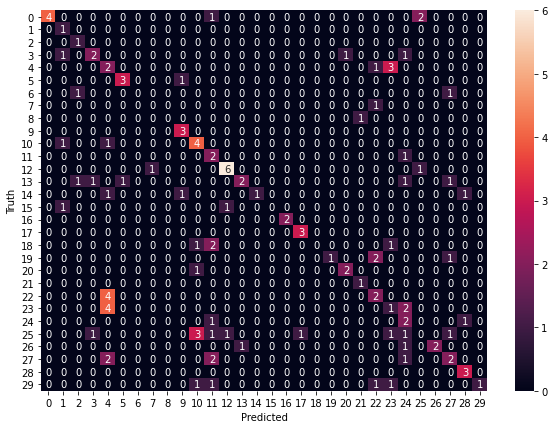

In [140]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [148]:
import joblib
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [143]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))